In [1]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

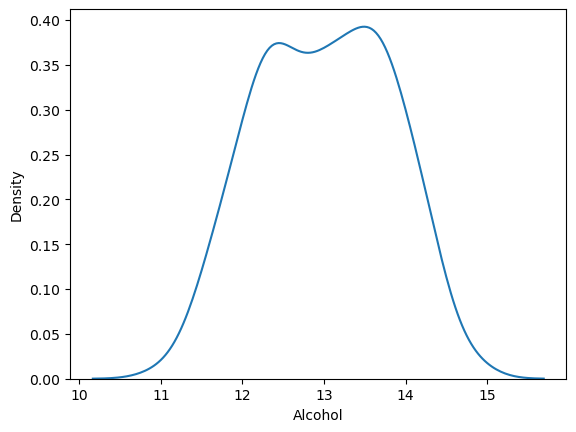

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

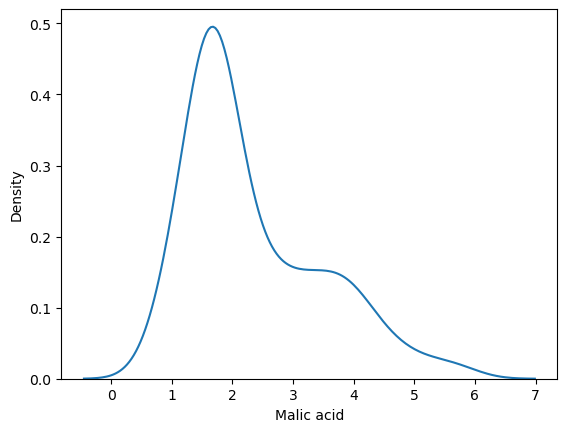

In [5]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

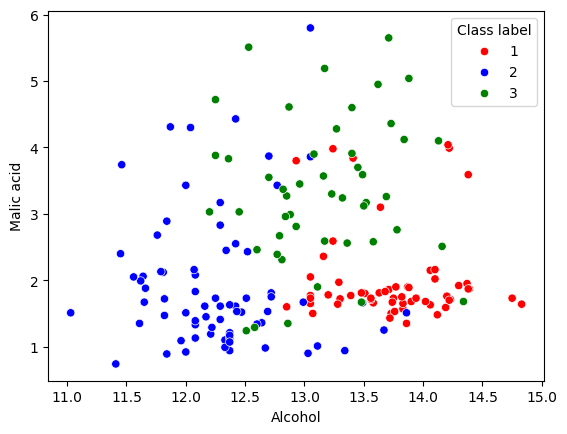

In [7]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),
                                              df['Class label'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# fit the scaler to the train set it will learn the parameter
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [18]:
x_train.head

<bound method NDFrame.head of      Alcohol  Malic acid
22     13.71        1.86
108    12.22        1.29
175    13.27        4.28
145    13.16        3.57
71     13.86        1.51
..       ...         ...
103    11.82        1.72
67     12.37        1.17
117    12.42        1.61
47     13.90        1.68
172    14.16        2.51

[124 rows x 2 columns]>

In [16]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [17]:
x_train_scaled.head

<bound method NDFrame.head of       Alcohol  Malic acid
0    0.720430    0.203782
1    0.319892    0.084034
2    0.602151    0.712185
3    0.572581    0.563025
4    0.760753    0.130252
..        ...         ...
119  0.212366    0.174370
120  0.360215    0.058824
121  0.373656    0.151261
122  0.771505    0.165966
123  0.841398    0.340336

[124 rows x 2 columns]>

In [21]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


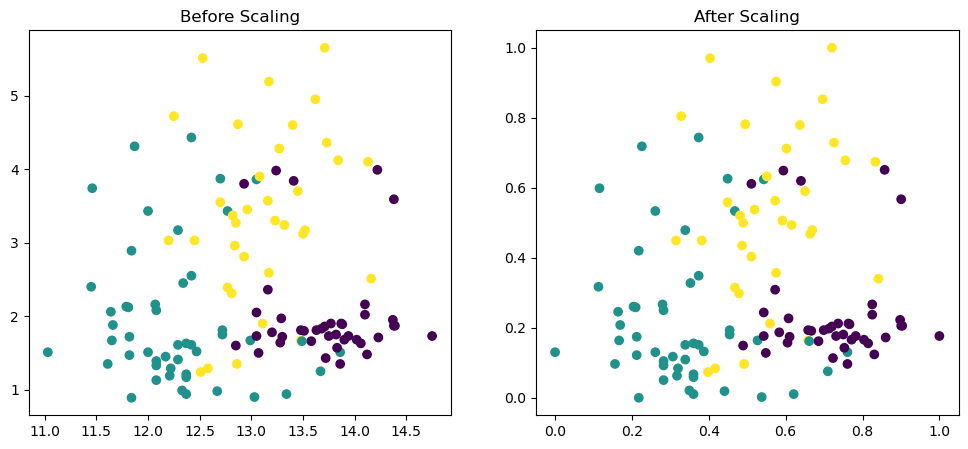

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

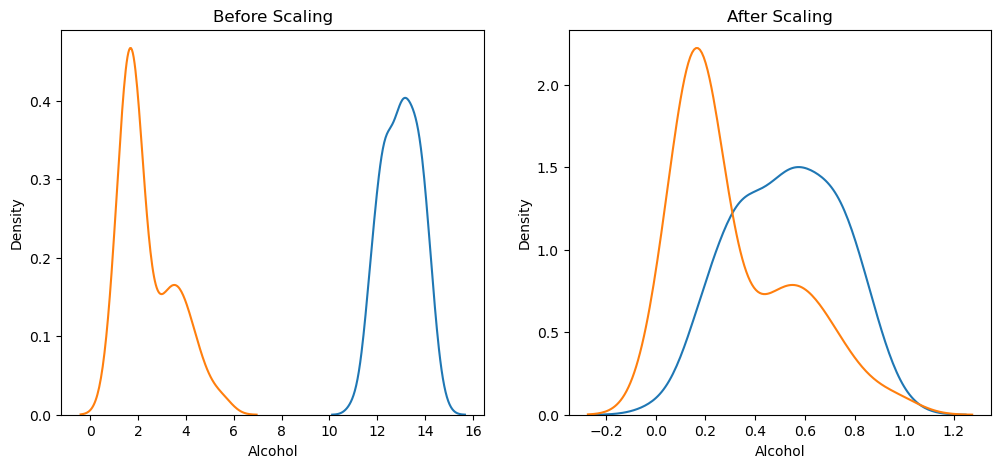

In [23]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)
#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)
plt.show()

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('alcohol distribution before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)

#after scaling
ax2.set_title('age distribution after Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

plt.show()#distribution is same only change in scaling